## Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


import pickle

## Data Import

In [3]:
df_purchase = pd.read_csv('purchase data.csv')

## Data Exploration

In [4]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation

### Import Segmentation Model

In [6]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [7]:
pca = pickle.load(open('pca.pickle','rb'))

In [8]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [9]:
#Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

## PCA

In [10]:
#We apply PCA to transform our seven categories purchase data into three components.
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
#PCA will contain duplicates of customers

## K-Means PCA

In [11]:
#Get PCA scores to determin clusters
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [12]:
 #Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()

In [13]:
# Add segment labels to indicate which cluster the observation belongs to
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

### Data Analysis by Customer

In [14]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [15]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [17]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [19]:
# Find segments customers belong to
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [21]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


### The new data frame has 500 rows which is the exact number of customers. Here we can observe the shopping behaviour of each customer, however since we have 500 individuals it will be quite difficult to wrap our head around emerging patterns.Instead we analyse the behaviour of the four segments.

## Segment Proportions

In [22]:
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


Text(0.5, 1.0, 'Segment Proportions')

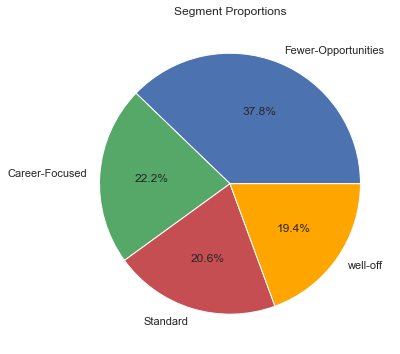

In [26]:
plt.figure(figsize = (9,6))
plt.pie(segm_prop['Segment Proportions'],
       labels = ['Fewer-Opportunities', 'Career-Focused', 'Standard','well-off'],
       autopct = '%1.1f%%',
       colors = ('b','g','r','orange'))
plt.title('Segment Proportions')

## Purchase Occasion and Purchase Incidence

### We'll find a quantitative measure to describe the purchase behaviours by segments. In other words we'd like to know how often people from differenct segments visits the store.How often do the buy candy bars, how do they buy relative to the number of their store visits.

### We'll calculate the mean and standard deviation by segments of our data frame.The mean shows the average behaviour of each segments. While the s.d shows how homogenous each segment is.

In [27]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [28]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

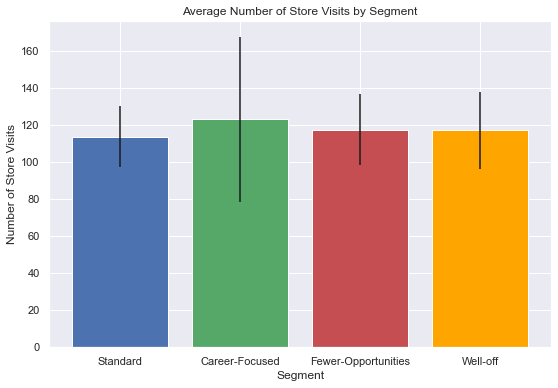

In [29]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('Standard', 'Career-Focused','Fewer-Opportunities','Well-off'),
       height = segments_mean['N_Visits'],
       yerr = segments_std['N_Visits'],
       color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

### The height represent the mean store visits. The vertical line indicate the dispersion of the dipersion of the data points.The few-opportunities shows the least number of store visits. The career-focused shows the highest s.d which means customers in this segment are  least homogenous i.e least alike interms of how often they visit the store. All other segments are very similar interms of average visits.This will make them more comparable with regard to future analysis.

Text(0.5, 1.0, 'Number of Purchase Incidences by Segment')

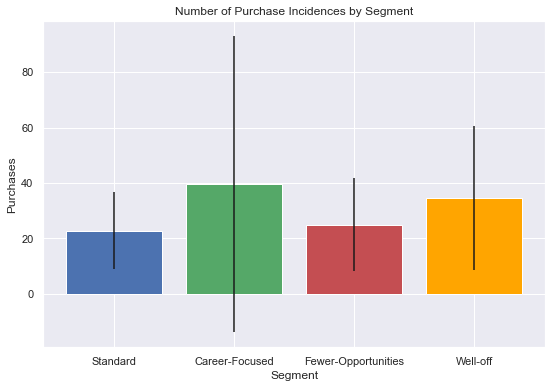

In [30]:
plt.figure(figsize = (9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('Standard', 'Career-Focused','Fewer-Opportunities','Well-off'),
       height = segments_mean['N_Purchases'],
       yerr = segments_std['N_Purchases'],
       color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchases')
plt.title('Number of Purchase Incidences by Segment')

### The career focused shows the highest s.d. This may be due one part buying frequently and other part buying less.Eventhough income is similar, spending habits may be different.

## Brand Choice

In [32]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [33]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],prefix ='Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [34]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [35]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

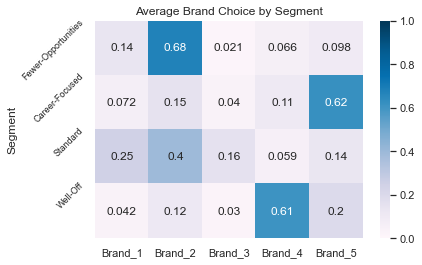

In [44]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0,1,2,3], ['Fewer-Opportunities', 'Career-Focused','Standard','Well-Off'], rotation= 45,fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

### The 5 brands are arranged in ascending order of price. The fewer opportunities segment shows a strong preference for brand 2(70%).Price is not a determining factor.62% of career-focused segment have preference for Brand 5 i.e most expensive indicating a preference for luxury, hence an opportunity to raise the price further.Well off shows preference for Brand 4 another expensive brand.Standard segment the most heterogenous has their preferene scattered all around.For actionable insight, one idea is to infuluence Standard segment to try out different brands.

## Revenue

### We'll calculate the Revenues for each brand and in total by segment

In [56]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [57]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [58]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [59]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [60]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Pheldox\anaconda3\envs\hashanalytics\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [61]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
1,1,736.09,1791.78,664.75,2363.84,19456.74,25013.20
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,699.47,1298.23,725.54,14009.29,5509.69,22242.22


In [62]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
Career-Focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
Fewer-Opportunities,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Well-Off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194


### Pricing Analysis
* If Brand 3 reduces its price the fewer opportunities segments could pivot towards it.
* If brand 4 increases price, revenues will not drop since customers in the well off segment appear to be loyal.Customers could even buy the more expensive alternative.Hence customers will be retained and revenue increased per sale.